<a href="https://colab.research.google.com/github/alexdel1/graph_csv_to_svg/blob/main/EDPchapter1_2_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

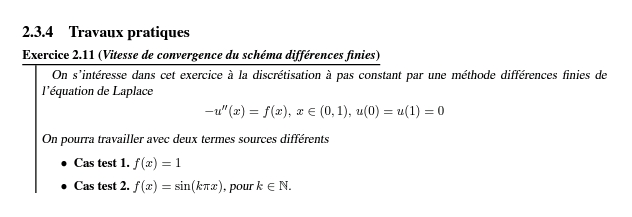

On rappelle que le schéma différences finies est un système linéaire de la forme AU = b, avec A et b donnés dans (2.35).

1. Solution exacte. Déterminer pour chacun des cas tests la solution exacte du problème de Laplace.

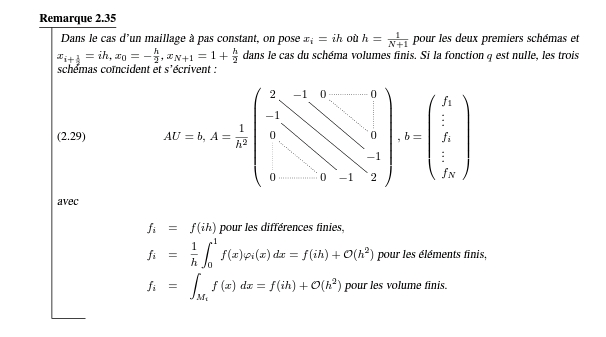

In [ ]:
n=5

In [ ]:

from sympy import symbols, Eq, Function, dsolve,Derivative
y= symbols("y", cls=Function)
x = symbols("x")
result1=dsolve(-Derivative(y(x), x,x) -1, y(x), ics={y(0): 0, y(1): 0})
result1

Eq(y(x), -x**2/2 + x/2)

In [ ]:
result1.rhs.subs(x, 0.5)

0.125000000000000

In [ ]:

from sympy import symbols, Eq, Function, dsolve,Derivative,pi,sin,S,simplify,Matrix
y= symbols("y", cls=Function)
x = symbols("x")
k = symbols("k" , integer=True, positive=True)
result2=dsolve(-Derivative(y(x), x,x) -sin(k*pi*x), y(x), ics={y(0): 0, y(1): 0})
display(result2)

Eq(y(x), sin(pi*k*x)/(pi**2*k**2))

2. Implémentation numérique. Écrire en Python une fonction qui, étant donné un pas h = 1/N+1 et une fonction f, calcule la solution approchée par différences finies du problème de Laplace.

In [ ]:
import numpy as np
n=5

In [ ]:
diag=np.diag([2 for i in range(n)])
diags=np.diag([-1 for i in range(n-1)],k=1)
diagi=np.diag([-1 for i in range(n-1)],k=-1)

In [ ]:
h=1/(n+1)

In [ ]:
def f1(x):
  # Définir le symbole
  x = symbols("x")
  # Définir la fonction constante
  f = Function('f')(x)
  constant_function = f.subs(f, 1)
  return constant_function

In [ ]:
def f2(x):
  x = symbols("x")
  k = symbols("k" , integer=True, positive=True)
  return sin(k*pi*x)

In [ ]:
f1(x).subs(x,1.2)

1

In [ ]:
A=diag+diags+diagi
A=1/h**2*A
A

array([[ 72., -36.,   0.,   0.,   0.],
       [-36.,  72., -36.,   0.,   0.],
       [  0., -36.,  72., -36.,   0.],
       [  0.,   0., -36.,  72., -36.],
       [  0.,   0.,   0., -36.,  72.]])

In [ ]:
b=[f1(x).subs(x,(i+1)*h) for i in range(n)]
b

[1, 1, 1, 1, 1]

In [ ]:
A=Matrix(A)
b=Matrix(b)

In [ ]:
U=A.solve(b)

In [ ]:

import sympy as sp

def phii(x, xi_m1, xi,xi_p1):
    """
    Define the piecewise linear basis function φi(x)

    Parameters:
    x: symbolic variable
    xi_1: left node point
    xi: right node point
    """
    # Create the piecewise function using Piecewise
    return sp.Piecewise(
        ((x - xi_m1) / (xi - xi_m1), sp.And(xi_m1 <= x, x <= xi)),   # First piece
        ((xi_p1 - x) / (xi_p1 - xi), sp.And(xi <= x, x <= xi_p1)),     # Second piece
        (0, True)                                                 # Default case
    )

# Symbolic variables
x, xi_p1,xi_m1, xi = sp.symbols('x x_{i+1} x_{i-1} x_i')

# Create the basis function
basis_func = phii(x, xi_p1,xi_m1, xi)

# Optional: Simplify or further manipulate the function
simplified_func = sp.simplify(basis_func)

print("Piecewise Linear Basis Function:")
display(simplified_func)

Piecewise Linear Basis Function:


Piecewise(((-x + x_{i+1})/(x_{i+1} - x_{i-1}), (x >= x_{i+1}) & (x <= x_{i-1})), ((-x + x_i)/(x_i - x_{i-1}), (x >= x_{i-1}) & (x <= x_i)), (0, True))

In [ ]:

h=1/(n+1)
t=[(i+1)*h for i in range(n)]
t=[0]+t+[1]
#t

In [ ]:
phil=[phii(x,t[i-1],t[i],t[i+1]) for i in range(1,n+1)]
phil[0]

Piecewise((6.0*x, (x <= 0.166666666666667) & (x >= 0)), (2.0 - 6.0*x, (x >= 0.166666666666667) & (x <= 0.333333333333333)), (0, True))

In [ ]:
#phil[0](0.005)
phil[0].subs(x, 0.005)

0.0300000000000000

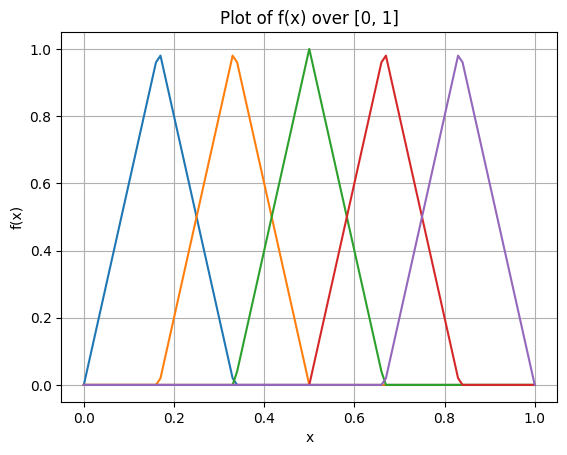

In [ ]:
import matplotlib.pyplot as plt


# Generate x values from 0 to 1 with a step of 1/100
step=0.01
a = np.arange(0, 1+step, step)
# Calculate corresponding y values using the function f(x)
y = [[phil[j].subs(x, a_i) for a_i in a] for j in range(len(phil))]
# Plot the graph
for k in range(len(y)):
  plt.plot(a, y[k])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) over [0, 1]')
plt.grid(True)
plt.show()

In [ ]:
print(len(phil))
print(len(U))
phil=np.array(phil).reshape((n, 1))
U=np.array(U).reshape((n, 1))
phildot=np.transpose(phil)@U
print(phildot.shape)

5
5
(1, 1)


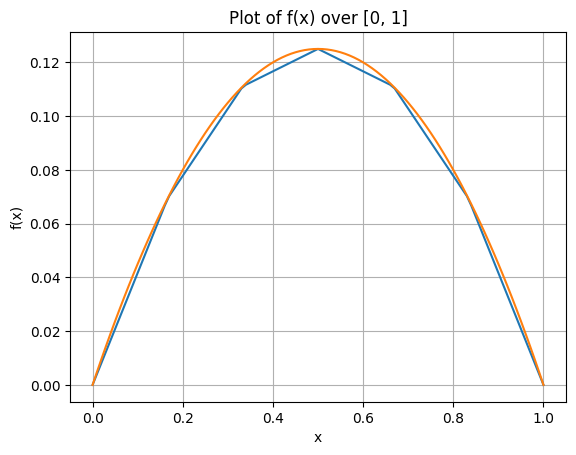

In [ ]:
step=0.01
a = np.arange(0, 1+step, step)
# Calculate corresponding y values using the function f(x)

y = [phildot[0,0].subs(x, a_i) for a_i in a]
fth = [result1.rhs.subs(x, a_i) for a_i in a]
# Plot the graph
#for k in range(len(y)):
plt.plot(a, y )
plt.plot(a, fth )
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) over [0, 1]')
plt.grid(True)
plt.show()

In [ ]:
def philf(n,f):
  h=1/(n+1)
  diag=np.diag([2 for i in range(n)])
  diags=np.diag([-1 for i in range(n-1)],k=1)
  diagi=np.diag([-1 for i in range(n-1)],k=-1)
  h=1/(n+1)
  A=diag+diags+diagi
  A=1/h**2*A
  b=[f(x).subs(x,(i+1)*h) for i in range(n)]
  A=Matrix(A)
  b=Matrix(b)
  U=A.solve(b)
  t=[(i+1)*h for i in range(n)]
  t=[0]+t+[1]
  phil=[phii(x,t[i-1],t[i],t[i+1]) for i in range(1,n+1)]
  phil=np.array(phil).reshape((n, 1))
  U=np.array(U).reshape((n, 1))
  phildot=np.transpose(phil)@U
  return phildot,U

In [ ]:
phildot,U1h=philf(n,f1)
print(phildot)

[[0.0694444444444444*Piecewise((6.0*x, (x <= 0.166666666666667) & (x >= 0)), (2.0 - 6.0*x, (x >= 0.166666666666667) & (x <= 0.333333333333333)), (0, True)) + 0.125*Piecewise((6.0*x - 2.0, (x >= 0.333333333333333) & (x <= 0.5)), (4.0 - 6.0*x, (x >= 0.5) & (x <= 0.666666666666667)), (0, True)) + 0.111111111111111*Piecewise((6.0*x - 1.0, (x >= 0.166666666666667) & (x <= 0.333333333333333)), (3.0 - 6.0*x, (x >= 0.333333333333333) & (x <= 0.5)), (0, True)) + 0.0694444444444444*Piecewise((6.0*x - 4.0, (x >= 0.666666666666667) & (x <= 0.833333333333333)), (6.0 - 6.0*x, (x >= 0.833333333333333) & (x <= 1)), (0, True)) + 0.111111111111111*Piecewise((6.0*x - 3.0, (x >= 0.5) & (x <= 0.666666666666667)), (5.0 - 6.0*x, (x >= 0.666666666666667) & (x <= 0.833333333333333)), (0, True))]]


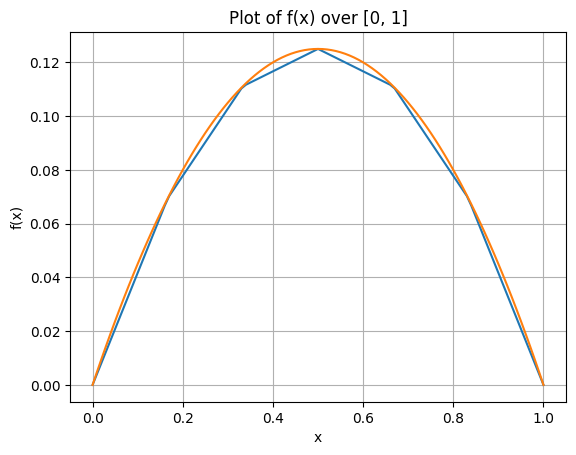

In [ ]:
step=0.01
a = np.arange(0, 1+step, step)
# Calculate corresponding y values using the function f(x)

y = [phildot[0,0].subs(x, a_i) for a_i in a]
fth = [result1.rhs.subs(x, a_i) for a_i in a]
# Plot the graph
#for k in range(len(y)):
plt.plot(a, y )
plt.plot(a, fth )
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) over [0, 1]')
plt.grid(True)
plt.show()

In [ ]:
phildot,U2h=philf(n,f2)

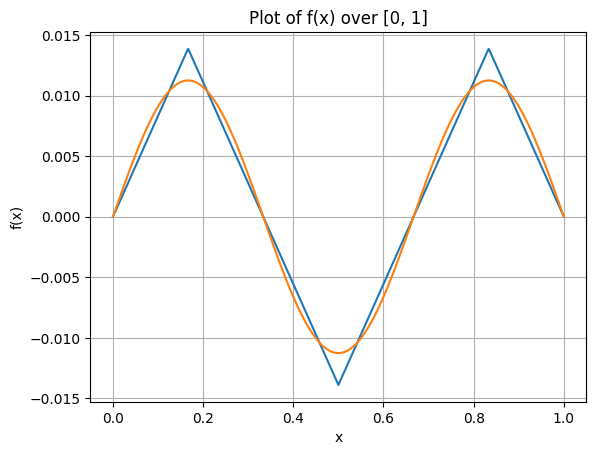

In [ ]:
step=0.001
a = np.arange(0, 1+step, step)

kex=3 # attention c'est un entier
# Calculate corresponding y values using the function f(x)
x, k = symbols('x k')
h1=sp.lambdify([x,k], phildot[0,0], 'numpy')
h2=sp.lambdify([x,k], result2.rhs, 'numpy')
y = [h1(a[i],kex) for i in range(len(a))]
fth = [h2(a[i],kex) for i in range(len(a))]



# Plot the graph
#for k in range(len(y)):
plt.plot(a, y )
plt.plot(a, fth )
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) over [0, 1]')
plt.grid(True)
plt.show()

numpy tensorflow

3. Calcul de l’erreur. Pour les deux cas test, calculer l’erreur entre la solution exacte et la solution approchée pour différentes valeurs de N (par exemple, N = 10,20,40,80,160). Exprimer l’erreur en norme infinie.

\begin{align*}
\bar{u} &= \text{solution du problème } \\
\bar{U} &= (\bar{u}(x_i))_{i=1,\ldots,N}
\end{align*}

Erreur de consistance :

$$R=A\overline{U}-b$$

Erreur :

$$\|U - \bar{U}\|_{\infty}$$

###<span>$\text{Cas} \, \, n=5:$</span>

In [ ]:
n=5
kex=3
h=1/(n+1)
t=[(i+1)*h for i in range(n)]
G1=sp.lambdify([x], result1.rhs, 'numpy')
G2=sp.lambdify([x,k], result2.rhs, 'numpy')

In [ ]:
from scipy.sparse.linalg import spsolve

In [ ]:
def Uf(n,f,kex):
  diag=np.diag([2 for i in range(n)])
  diags=np.diag([-1 for i in range(n-1)],k=1)
  diagi=np.diag([-1 for i in range(n-1)],k=-1)
  h=1/(n+1)
  A=diag+diags+diagi
  A=1/h**2*A
  flambda=sp.lambdify([x,k],f(x),'numpy')
  b=[flambda((i+1)*h,kex) for i in range(n)]
  U=spsolve(A,b)
  return np.array(U),b

In [ ]:
def Af(n):
  h=1/(n+1)
  diag=np.diag([2 for i in range(n)])
  diags=np.diag([-1 for i in range(n-1)],k=1)
  diagi=np.diag([-1 for i in range(n-1)],k=-1)
  A=diag+diags+diagi
  A=1/h**2*A
  return A

In [ ]:
n=5

kex=3
#nl=[5,10,20,40,80,160]
erreur1=[]
erreur2=[]
hl=[]
R2=[]

for n in [5]:
  h=1/(n+1)
  hl+=[h]
  t=[(i+1)*h for i in range(n)]
  U1h,b1=Uf(n,f1,kex)
  U2h,b2=Uf(n,f2,kex)
  U1=[G1(t_i) for t_i in t]
  U2=[G2(t_i,kex) for t_i in t]
  #U2h=[sp.lambdify([k],U2h[i,0],'numpy')(kex) for i in range(len(U2h))]
  U1h=np.array(U1h).reshape((n,1))
  U2h=np.array(U2h).reshape((n,1))
  U1=np.array(U1).reshape((n,1))
  U2=np.array(U2).reshape((n,1))
  erreur1 += [max(U1h-U1)]
  erreur2 += [max(U2h-U2)]
  b2=np.array(b2).reshape((n,1))
  R2 += [ np.linalg.norm(Af(n)@U2 - b2,np.inf)]

<ipython-input-30-00499c1ecd8f>:10: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  U=spsolve(A,b)


### <span>$\text{Cas} \, \, n \in \{10,20,40,80,160 \}$</span>

In [ ]:
kex=3
nl=[5,10,20,40,80,160]
erreur1=[]
erreur2=[]
hl=[]
R2=[]
for n in nl:
  h=1/(n+1)
  hl+=[h]
  t=[(i+1)*h for i in range(n)]
  U1h,b1=Uf(n,f1,kex)
  U2h,b2=Uf(n,f2,kex)
  U1=[G1(t_i) for t_i in t]
  U2=[G2(t_i,kex) for t_i in t]
  #U2h=[sp.lambdify([k],U2h[i,0],'numpy')(kex) for i in range(len(U2h))]
  U1h=np.array(U1h).reshape((n,1))
  U2h=np.array(U2h).reshape((n,1))
  U1=np.array(U1).reshape((n,1))
  U2=np.array(U2).reshape((n,1))
  erreur1 += [max(U1h-U1)]
  erreur2 += [max(U2h-U2)]
  b2=np.array(b2).reshape((n,1))
  R2 += [ np.linalg.norm(Af(n)@U2 - b2,np.inf)]

<ipython-input-30-00499c1ecd8f>:10: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  U=spsolve(A,b)


In [ ]:

import pandas as pd

# Create the data
data = {
    "n": nl,
    "h": hl,
    "erreur 1": erreur1,
    "erreur 2": erreur2,
    "R 2": R2
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
display(df)

,n,h,erreur 1,erreur 2,R 2
0,5,0.166667,[0.0],[0.002630979595295801],0.189431
1,10,0.090909,[2.7755575615628914e-17],[0.000707465020495757],0.059090
2,20,0.047619,[2.7755575615628914e-17],[0.00018609702770188384],0.016255
3,40,0.024390,[-5.204170427930421e-18],[4.966844437468386e-05],0.004392
4,80,0.012346,[-3.469446951953614e-17],[1.2688415178681647e-05],0.001126
5,160,0.006211,[-1.734723475976807e-17],[3.215294425297499e-06],0.000286


4. Visualisation de la convergence. Tracer en échelle logarithmique (log-log) l’erreur en fonction de h. Interpréter la pente de la courbe pour estimer l’ordre de convergence du schéma. Que remarquez-vous?

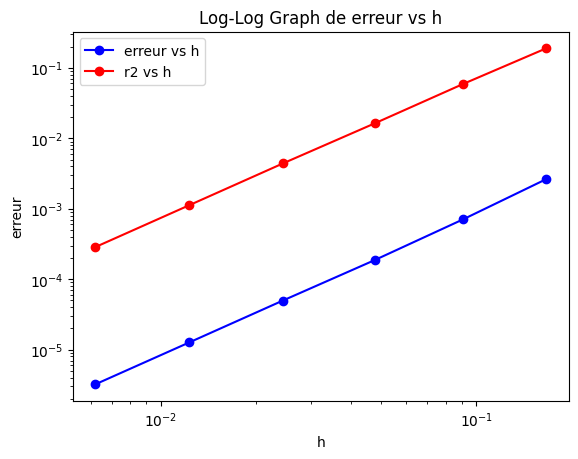

In [ ]:

import matplotlib.pyplot as plt


# Create the plot
plt.loglog(hl, erreur2, marker='o', linestyle='-', color='b', label='erreur vs h')
plt.loglog(hl, R2, marker='o', linestyle='-', color='r', label='r2 vs h')

# Add # Add labels and title
plt.xlabel('h')
plt.ylabel('erreur')
plt.title('Log-Log Graph de erreur vs h')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
slope, intercept = np.polyfit(np.log10(hl), np.log10(erreur2), 1)
print(slope, intercept)

[2.02989662] [-1.02480578]


In [ ]:
slope, intercept = np.polyfit(np.log10(hl), np.log10(R2), 1)
print(slope, intercept)

1.9770099952545652 0.8242584157713764


On a bien un ordre 2.

In [ ]:
y_fit = np.polyval((slope, intercept), np.log10(hl))

# Calculate the residual sum of squares
ss_res = np.sum((np.log10(R2)- y_fit) ** 2)

# Calculate the total sum of squares
ss_tot = np.sum((np.log10(R2)- np.mean(np.log10(R2))) ** 2)

# Calculate R^2
r_squared = 1 - (ss_res / ss_tot)


print(f"R^2: {r_squared}")

R^2: 0.9999663949192392


99.9 % de la variance des données est expliquée par le modèle.

In [ ]:
?np.polyfit

$$
\| \bar{U} - U \|_\infty \leq \| A^{-1} \|_\infty \| R \|_\infty \\
\log_{10}(\| \bar{U}(h) - U(h) \|_\infty ) = a*\log_{10}(h) + b + \epsilon(h) \\
\| \bar{U}(h) - U(h) \|_\infty = Kh^a * \rho(h) \\
R=A\bar{U}-b \text{ et } 0=AU-b  \text { donc } \\
R=A(\bar{U} - U) \\
\| R \|_\infty \leq \| A \|_\infty \| \bar{U}-U \|_\infty \\
\| A \|_\infty=4/h^2
$$

Par ces formules, peut on remonter d'un $O$ sur $ \| \bar{U}-U \|_\infty$ à un $O$ sur $\|R\|_\infty$ ?

In [ ]:
diag=np.diag([2 for i in range(n)])
diags=np.diag([-1 for i in range(n-1)],k=1)
diagi=np.diag([-1 for i in range(n-1)],k=-1)
A=diag+diags+diagi
infinity_norm = np.linalg.norm(A, np.inf)

print("Infinity norm of A:", infinity_norm)

Infinity norm of A: 4.0


In [ ]:
4*161**2

103684

In [ ]:

A=Af(160)
# Calculate the infinity norm
infinity_norm = np.linalg.norm(A, np.inf)

print("Infinity norm of A:", infinity_norm)

Infinity norm of A: 103684.00000000001


5. Pour aller plus loin. Proposer et étudier vos propres cas tests en choisissant des fonctions f telles que la solution exacte u présente des caractéristiques spécifiques (par exemple, faible régularité, etc.).

Entre 0 et 0.5, je vais utiliser $X^3$, et je veux la raccorder avec un polynôme du troisième degré entre 0.5 et 1 respectant la condition initiale $u(1)=0$ et se raccordant en $C^0$, $C^1$ et $C^2$ au point 0,5.

In [ ]:
A=np.array([[1, 1 ,1 ,1],
             [1/8, 1/4 ,1/2, 1],
             [3*1/4 ,1, 1, 0],
             [6*1/2, 2 ,0, 0]])

In [ ]:
B=[[0],
   [1/8],
    [3*1/4],
    [3]]

In [ ]:
U=spsolve(A,B)
U

<ipython-input-45-6dd4fa0a00ad>:1: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  U=spsolve(A,B)


array([-7., 12., -6.,  1.])

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Piecewise, diff, lambdify

In [ ]:
Usol=Piecewise((x**3, x < 0.5), (-7*x**3 + 12*x**2 - 6*x + 1, True))

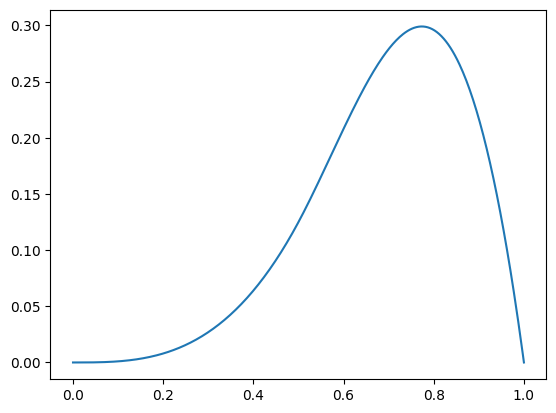

In [ ]:



x_vals = np.linspace(0, 1, 400)
Usol_np = lambdify(x, Usol, 'numpy')
y_Usol_vals = Usol_np(x_vals)
plt.plot(x_vals,y_Usol_vals)

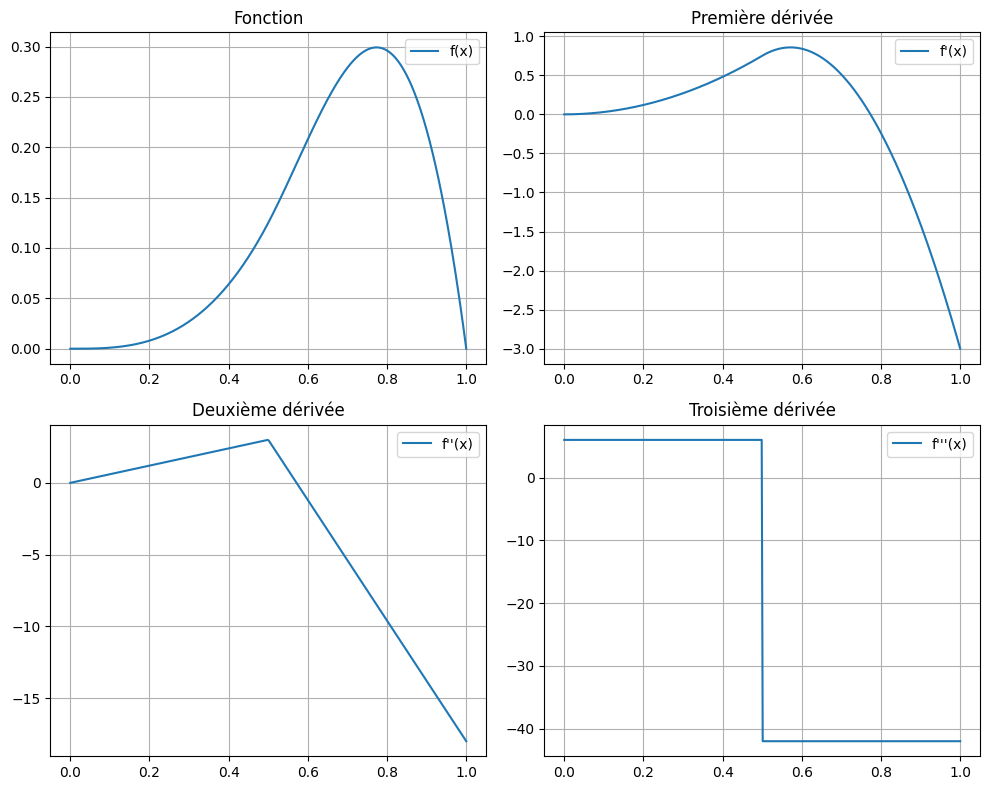

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Piecewise, diff, lambdify

# Définir les symboles
x = symbols('x')

# Définir la fonction f(x)
f = Usol

# Calculer les dérivées successives
f_prime = diff(f, x)
f_double_prime = diff(f_prime, x)
f_triple_prime = diff(f_double_prime, x)
f_quadruple_prime = diff(f_triple_prime, x)

# Convertir les expressions sympy en fonctions numpy
f_np = lambdify(x, f, 'numpy')
f_prime_np = lambdify(x, f_prime, 'numpy')
f_double_prime_np = lambdify(x, f_double_prime, 'numpy')
f_triple_prime_np = lambdify(x, f_triple_prime, 'numpy')
f_quadruple_prime_np = lambdify(x, f_quadruple_prime, 'numpy')

# Créer un espace de valeurs pour x
x_vals = np.linspace(0, 1, 400)

# Calculer les valeurs des fonctions
y_vals = f_np(x_vals)
y_prime_vals = f_prime_np(x_vals)
y_double_prime_vals = f_double_prime_np(x_vals)
y_triple_prime_vals = f_triple_prime_np(x_vals)
y_quadruple_prime_vals = f_quadruple_prime_np(x_vals)

# Tracer les dérivées successives
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 2)
plt.plot(x_vals, y_prime_vals, label="f'(x)")
plt.title("Première dérivée")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_vals, y_double_prime_vals, label="f''(x)")
plt.title("Deuxième dérivée")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_vals, y_triple_prime_vals, label="f'''(x)")
plt.title("Troisième dérivée")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 1)
plt.plot(x_vals, y_vals, label="f(x)")
plt.title("Fonction")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def f3(x):
  x = symbols("x")
  k = symbols("k" , integer=True, positive=True)
  return -f_double_prime
  #return sin(k*pi*x)

In [ ]:
from sympy import symbols, Eq, Function, dsolve,Derivative,pi,sin,S,simplify,Matrix
y= symbols("y", cls=Function)
x = symbols("x")
k = symbols("k" , integer=True, positive=True)
result3=dsolve(-Derivative(y(x), x,x) -f3(x), y(x), ics={y(0): 0, y(1): 0})
display(result3)

Eq(y(x), -5*x + Piecewise((x**3, x < 0.5), (-7*x**3 + 12*x**2, True)))

Sympy ne sait pas résoudre correctement les fonctions piecewise.

In [ ]:
f3(x)

-Piecewise((6*x, x < 0.5), (24 - 42*x, True))

In [ ]:

from sympy import symbols, Eq, Function, dsolve, Derivative, Piecewise, solve

# Définir les variables symboliques
x = symbols('x')
y = Function('y')(x)

# Définir les deux fonctions forcées
f1 = -6 * x  # Intervalle 1 : x < 0.5
f2 = 42 * x - 24  # Intervalle 2 : x >= 0.5

# Résoudre pour l'intervalle 1
eq1 = Eq(Derivative(y, x, x) + f1, 0)
sol1 = dsolve(eq1)

# Résoudre pour l'intervalle 2
eq2 = Eq(Derivative(y, x, x) + f2, 0)
sol2 = dsolve(eq2)

# Extraire les solutions générales
y1 = sol1.rhs  # Solution pour x < 0.5
y2 = sol2.rhs  # Solution pour x >= 0.5

# Définir des constantes symboliques pour chaque intervalle
C1_1, C2_1 = symbols('C1_1 C2_1')  # Constantes pour y1
C1_2, C2_2 = symbols('C1_2 C2_2')  # Constantes pour y2

# Substituer les constantes
y1 = y1.subs({'C1': C1_1, 'C2': C2_1})
y2 = y2.subs({'C1': C1_2, 'C2': C2_2})

# Imposer la continuité en x = 0.5
continuity_y = Eq(y1.subs(x, 0.5), y2.subs(x, 0.5))  # Continuité de y
continuity_dy = Eq(y1.diff(x).subs(x, 0.5), y2.diff(x).subs(x, 0.5))  # Continuité de y'

# Imposer les conditions initiales
bc1 = Eq(y1.subs(x, 0), 0)  # Condition initiale : y(0) = 0
bc2 = Eq(y2.subs(x, 1), 0)  # Condition initiale : y(1) = 0

# Résoudre le système pour les constantes
constants = solve([continuity_y, continuity_dy, bc1, bc2], [C1_1, C2_1, C1_2, C2_2])

# Substituer les constantes trouvées dans les solutions
y1_final = y1.subs(constants)
y2_final = y2.subs(constants)

# Combiner les solutions dans une fonction par morceaux
result3 = Piecewise((y1_final, x < 0.5), (y2_final, x >= 0.5))

print("Solution :", result3)

Solution : Piecewise((x**3, x < 0.5), (-7*x**3 + 12*x**2 - 6.0*x + 1.0, True))


In [ ]:
kex=3
nl=[5,10,20,40,80,160]
erreur3=[]
hl=[]
R3=[]
#G3=sp.lambdify([x,k], result3.rhs, 'numpy')
G3=sp.lambdify([x], result3, 'numpy')
for n in nl:
  h=1/(n+1)
  hl+=[h]
  t=[(i+1)*h for i in range(n)]
  U3h,b3=Uf(n,f3,kex)
  U3=[G3(t_i) for t_i in t]
  #U3=[G3(t_i,kex) for t_i in t]
  U3h=np.array(U3h).reshape((n,1))
  U3=np.array(U3).reshape((n,1))
  erreur3 += [max(U3h-U3)]
  b3=np.array(b3).reshape((n,1))
  R3 += [ np.linalg.norm(Af(n)@U3 - b3,np.inf)]

<ipython-input-30-00499c1ecd8f>:10: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  U=spsolve(A,b)


In [ ]:

n=10
phildot,U3h=philf(n,f3)

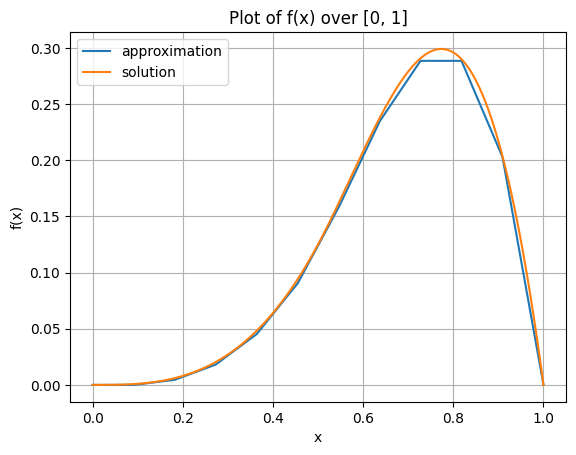

In [ ]:
step=0.001
a = np.arange(0, 1+step, step)

kex=3 # attention c'est un entier
# Calculate corresponding y values using the function f(x)
x, k = symbols('x k')
#h1=sp.lambdify([x,k], phildot[0,0], 'numpy')
#h2=sp.lambdify([x,k], result3.rhs, 'numpy')
#y = [h1(a[i],kex) for i in range(len(a))]
#fth = [h2(a[i],kex) for i in range(len(a))]
h1=sp.lambdify([x], phildot[0,0], 'numpy')
h2=sp.lambdify([x], result3, 'numpy')
y = [h1(a[i]) for i in range(len(a))]
fth = [h2(a[i]) for i in range(len(a))]


# Plot the graph
#for k in range(len(y)):
plt.plot(a, y , label="approximation")
plt.plot(a, fth ,label="solution")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) over [0, 1]')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Create the data
data = {
    "n": nl,
    "h": hl,
    "erreur 3": erreur3,
    "R 3": R3
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
display(df)

,n,h,erreur 3,R 3
0,5,0.166667,[-0.01851851851851851],1.333333
1,10,0.090909,[-0.0007513148009015792],0.090909
2,20,0.047619,[-0.00010797969981645689],0.047619
3,40,0.024390,[-1.4509365794806994e-05],0.024390
4,80,0.012346,[-1.8816764231819251e-06],0.012346
5,160,0.006211,[-2.396196175438736e-07],0.006211


In [ ]:
erreur3_absolute = np.abs(erreur3)

In [ ]:
slope, intercept = np.polyfit(np.log10(hl), np.log10(erreur3_absolute), 1)
print(slope, intercept)

[3.29286598] [0.53328994]


In [ ]:
slope, intercept = np.polyfit(np.log10(hl), np.log10(R3), 1)
print(slope, intercept)

1.4392989662285003 0.7999349049339617


A la valeur de "slope", pente de la régression, nous voyons que nous avons perdu l'ordre 2 car la solution du problème n'est plus $C^4$.

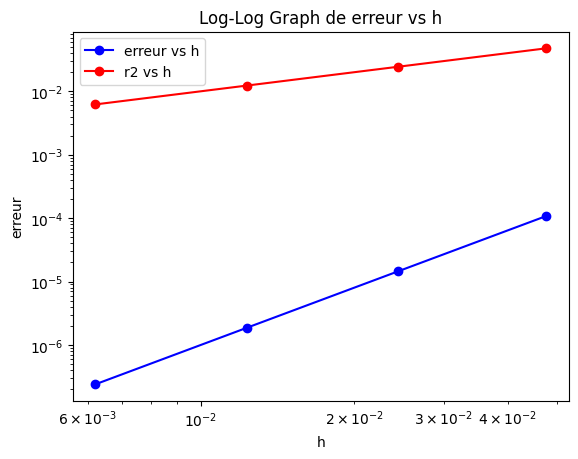

In [ ]:
import matplotlib.pyplot as plt


# Create the plot
plt.loglog(hl[2:], erreur3_absolute[2:], marker='o', linestyle='-', color='b', label='erreur vs h')
plt.loglog(hl[2:], R3[2:], marker='o', linestyle='-', color='r', label='r2 vs h')

# Add # Add labels and title
plt.xlabel('h')
plt.ylabel('erreur')
plt.title('Log-Log Graph de erreur vs h')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
slope, intercept = np.polyfit(np.log10(hl[2:]), np.log10(R3[2:]), 1)
print(slope, intercept)

0.9999999994401797 -8.451137770352116e-10


Calcul en ne prenant que $n\geq 20$.

6. Pour aller plus loin. Reprendre l’exercice en considérant un schéma à pas variable. Analyser l’impact du pas variable sur la convergence du schéma et comparer avec le cas du pas constant.

In [ ]:
import numpy as np
n=10
PairImpair=[i%2+1 for i in range( (n))]
PairImpair
norme=np.linalg.norm(np.array(PairImpair),ord=2)
PairImpair/norme

array([0.2, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.4])

In [ ]:
sum(PairImpair)

NameError: name 'PairImpair' is not defined

different odd and even and fewrite the matrix formula